# Stagg examples

The main purpose of Stagg is to move **st**atistical **agg**reggations, such as histograms, from one framework to the next. This requires a conversion of high-level domain concepts.

Consider the following example: in Numpy, a histogram is simply a 2-tuple of arrays with special meaning—bin contents, then bin edges.

In [1]:
import numpy

numpy_hist = numpy.histogram(numpy.random.normal(0, 1, int(10e6)), bins=80, range=(-5, 5))
numpy_hist

(array([     7,      5,      6,     15,     21,     53,     60,    137,
           219,    349,    583,    876,   1353,   2093,   3056,   4670,
          6786,   9811,  13368,  19252,  25565,  34301,  46091,  59534,
         76198,  96806, 120318, 147464, 177349, 211056, 245701, 283339,
        320954, 358960, 392392, 425929, 452418, 474259, 489515, 497578,
        497236, 490679, 474950, 453053, 426509, 394145, 357552, 320594,
        282968, 246501, 211415, 177334, 147734, 120183,  96589,  76797,
         59624,  45734,  34380,  25547,  18888,  13432,   9527,   6559,
          4640,   3123,   2109,   1401,    927,    556,    317,    228,
           123,     80,     47,     28,     18,     12,      7,      3]),
 array([-5.   , -4.875, -4.75 , -4.625, -4.5  , -4.375, -4.25 , -4.125,
        -4.   , -3.875, -3.75 , -3.625, -3.5  , -3.375, -3.25 , -3.125,
        -3.   , -2.875, -2.75 , -2.625, -2.5  , -2.375, -2.25 , -2.125,
        -2.   , -1.875, -1.75 , -1.625, -1.5  , -1.375, -1.25 

We convert that into its Stagg equivalent with a connector (two-function module: `tostagg` and `tonumpy`).

In [2]:
import stagg.connect.numpy

stagg_hist = stagg.connect.numpy.tostagg(numpy_hist)
stagg_hist

This object is instantiated from a class structure built from simple pieces.

In [3]:
stagg_hist.dump()

Histogram(
  axis=[
    Axis(binning=RegularBinning(num=80, interval=RealInterval(low=-5.0, high=5.0)))
  ],
  counts=
    UnweightedCounts(
      counts=
        InterpretedInlineInt64Buffer(
          buffer=
              [     7      5      6     15     21     53     60    137    219    349
                  583    876   1353   2093   3056   4670   6786   9811  13368  19252
                25565  34301  46091  59534  76198  96806 120318 147464 177349 211056
               245701 283339 320954 358960 392392 425929 452418 474259 489515 497578
               497236 490679 474950 453053 426509 394145 357552 320594 282968 246501
               211415 177334 147734 120183  96589  76797  59624  45734  34380  25547
                18888  13432   9527   6559   4640   3123   2109   1401    927    556
                  317    228    123     80     47     28     18     12      7      3])))


Now it can be converted to a ROOT histogram with another connector.

In [4]:
import stagg.connect.root

root_hist = stagg.connect.root.toroot(stagg_hist, "root_hist")
root_hist

Welcome to JupyROOT 6.14/04


<ROOT.TH1D object ("root_hist") at 0x558c704b3100>

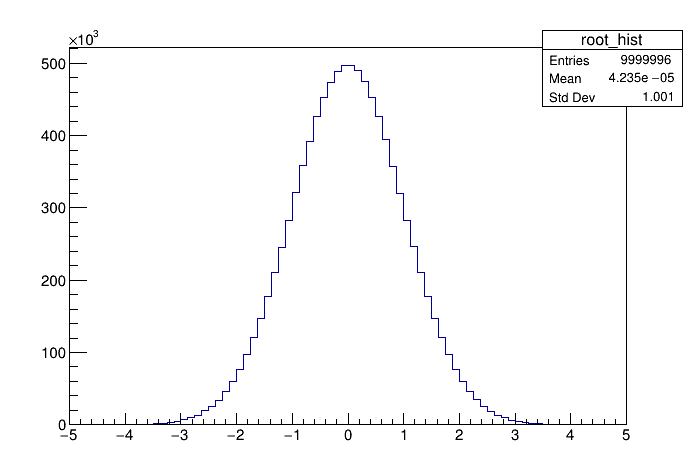

In [5]:
import ROOT
canvas = ROOT.TCanvas()
root_hist.Draw()
canvas.Draw()

And Pandas with yet another connector.

In [6]:
import stagg.connect.pandas

pandas_hist = stagg.connect.pandas.topandas(stagg_hist)
pandas_hist

,unweighted
"[-5.0, -4.875)",7
"[-4.875, -4.75)",5
"[-4.75, -4.625)",6
"[-4.625, -4.5)",15
"[-4.5, -4.375)",21
"[-4.375, -4.25)",53
"[-4.25, -4.125)",60
"[-4.125, -4.0)",137
"[-4.0, -3.875)",219
"[-3.875, -3.75)",349


The `stagg_hist` object is also a [Flatbuffers](http://google.github.io/flatbuffers/) object, which has a [multi-lingual](https://google.github.io/flatbuffers/flatbuffers_support.html), [random-access](https://github.com/mzaks/FlatBuffersSwift/wiki/FlatBuffers-Explained), [small-footprint](http://google.github.io/flatbuffers/md__benchmarks.html) serialization:

In [7]:
stagg_hist.tobuffer()

bytearray(b'\x04\x00\x00\x00\x90\xff\xff\xff\x10\x00\x00\x00\x00\x01\n\x00\x10\x00\x0c\x00\x0b\x00\x04\x00\n\x00\x00\x00`\x00\x00\x00\x00\x00\x00\x01\x04\x00\x00\x00\x01\x00\x00\x00\x0c\x00\x00\x00\x08\x00\x0c\x00\x0b\x00\x04\x00\x08\x00\x00\x00\x10\x00\x00\x00\x00\x00\x00\x02\x08\x00(\x00\x1c\x00\x04\x00\x08\x00\x00\x00\x00\x00\x00\x00\x00\x00\x14\xc0\x00\x00\x00\x00\x00\x00\x14@\x01\x00\x00\x00\x00\x00\x00\x00P\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x08\x00\n\x00\t\x00\x04\x00\x08\x00\x00\x00\x0c\x00\x00\x00\x00\x02\x06\x00\x08\x00\x04\x00\x06\x00\x00\x00\x04\x00\x00\x00\x80\x02\x00\x00\x07\x00\x00\x00\x00\x00\x00\x00\x05\x00\x00\x00\x00\x00\x00\x00\x06\x00\x00\x00\x00\x00\x00\x00\x0f\x00\x00\x00\x00\x00\x00\x00\x15\x00\x00\x00\x00\x00\x00\x005\x00\x00\x00\x00\x00\x00\x00<\x00\x00\x00\x00\x00\x00\x00\x89\x00\x00\x00\x00\x00\x00\x00\xdb\x00\x00\x00\x00\x00\x00\x00]\x01\x00\x00\x00\x00\x00\x00G\x02\x00\x00\x00\x00\x00\x00l\x03\x00\x00\x00\x00\x00\x00I\x05\x00\x00\x00\x00\x00\x00-\

In [8]:
print("Numpy size: ", numpy_hist[0].nbytes + numpy_hist[1].nbytes)

tmessage = ROOT.TMessage()
tmessage.WriteObject(root_hist)
print("ROOT size:  ", tmessage.Length())

import pickle
print("Pandas size:", len(pickle.dumps(pandas_hist)))

print("Stagg size:  ", len(stagg_hist.tobuffer()))

Numpy size:  1288
ROOT size:   1962
Pandas size: 2984
Stagg size:   792


Stagg is generally forseen as a memory format, like [Apache Arrow](https://arrow.apache.org), but for statistical aggregations. Like Arrow, it reduces the need to implement $N(N - 1)/2$ conversion functions among $N$ statistical libraries to just $N$ conversion functions. (See the figure on Arrow's website.)

It also intends to be as close to zero-copy as possible. This means that it must make graceful translations among conventions. Different histogramming libraries handle overflow bins in different ways:

In [9]:
fromroot = stagg.connect.root.tostagg(root_hist)
fromroot.axis[0].binning.dump()
print("Bin contents length:", len(fromroot.counts.array))

RegularBinning(
  num=80,
  interval=RealInterval(low=-5.0, high=5.0),
  overflow=RealOverflow(loc_underflow=BinLocation.below1, loc_overflow=BinLocation.above1))
Bin contents length: 82


In [10]:
stagg_hist.axis[0].binning.dump()
print("Bin contents length:", len(stagg_hist.counts.array))

RegularBinning(num=80, interval=RealInterval(low=-5.0, high=5.0))
Bin contents length: 80


And yet we want to be able to manipulate them as though these differences did not exist.

In [11]:
sum_hist = fromroot + stagg_hist

In [12]:
sum_hist.axis[0].binning.dump()
print("Bin contents length:", len(sum_hist.counts.array))

RegularBinning(
  num=80,
  interval=RealInterval(low=-5.0, high=5.0),
  overflow=RealOverflow(loc_underflow=BinLocation.above1, loc_overflow=BinLocation.above2))
Bin contents length: 82


The binning structure keeps track of the existence of underflow/overflow bins and where they are located.

   * ROOT's convention is to put underflow before the normal bins (`below1`) and overflow after (`above1`), so that the normal bins are effectively 1-indexed.
   * Boost.Histogram's convention is to put overflow after the normal bins (`above1`) and underflow after that (`above2`), so that underflow is accessed via `myhist[-1]` in Numpy.
   * Numpy histograms don't have underflow/overflow bins.
   * Pandas could have `Intervals` that extend to infinity.

Stagg accepts all of these, so that it doesn't have to manipulate the bin contents buffer it receives, but knows how to deal with them if it has to combine histograms that follow different conventions.

All the different axis types have an equivalent in Stagg (and not all are single-dimensional).

In [20]:
import stagg
stagg.IntegerBinning(5, 10).dump()
stagg.RegularBinning(100, stagg.RealInterval(-5, 5)).dump()
stagg.HexagonalBinning(0, 100, 0, 100, stagg.HexagonalBinning.cube_xy).dump()
stagg.EdgesBinning([0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100]).dump()
stagg.IrregularBinning([stagg.RealInterval(0, 5),
                        stagg.RealInterval(10, 100),
                        stagg.RealInterval(-10, 10)],
                       overlapping_fill=stagg.IrregularBinning.all).dump()
stagg.CategoryBinning(["one", "two", "three"]).dump()
stagg.SparseRegularBinning([5, 3, -2, 8, -100], 10).dump()
stagg.FractionBinning(error_method=stagg.FractionBinning.clopper_pearson).dump()
stagg.PredicateBinning(["signal region", "control region"]).dump()
stagg.VariationBinning([stagg.Variation([stagg.Assignment("x", "nominal")]),
                        stagg.Variation([stagg.Assignment("x", "nominal + sigma")]),
                        stagg.Variation([stagg.Assignment("x", "nominal - sigma")])]).dump()

IntegerBinning(min=5, max=10)
RegularBinning(num=100, interval=RealInterval(low=-5.0, high=5.0))
HexagonalBinning(qmin=0, qmax=100, rmin=0, rmax=100, coordinates=HexagonalBinning.cube_xy)
EdgesBinning(edges=[0.01 0.05 0.1 0.5 1 5 10 50 100])
IrregularBinning(
  intervals=[
    RealInterval(low=0.0, high=5.0),
    RealInterval(low=10.0, high=100.0),
    RealInterval(low=-10.0, high=10.0)
  ],
  overlapping_fill=IrregularBinning.all)
CategoryBinning(categories=['one', 'two', 'three'])
SparseRegularBinning(bins=[5 3 -2 8 -100], bin_width=10.0)
FractionBinning(error_method=FractionBinning.clopper_pearson)
PredicateBinning(predicates=['signal region', 'control region'])
VariationBinning(
  variations=[
    Variation(assignments=[
        Assignment(identifier='x', expression='nominal')
      ]),
    Variation(
      assignments=[
        Assignment(identifier='x', expression='nominal + sigma')
      ]),
    Variation(
      assignments=[
        Assignment(identifier='x', expression='nomina